# Cobalt titration experiments

In this notebook, we reproduce Fig. S20A and B of the manuscript, which contains the results of the cobalt titration experiments and calculations

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Fig. S20A: DFT calculations

In [34]:
dft = pd.read_csv('../data/figS20/figS20A.csv', index_col=0)

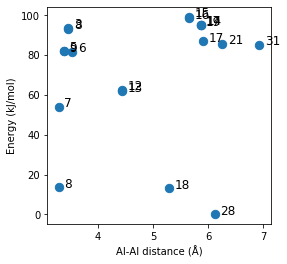

In [36]:
fig, ax = plt.subplots(figsize=(4, 4))

df_ = dft.loc[dft.energy < 100]

ax.scatter(
    df_['al_dist'],
    df_['energy'],
    s=70,
)

for _, row in df_.iterrows():
    ax.annotate(
        str(row['aluminum_idx']),
        (row['al_dist'] + 0.1, row['energy']),
        fontsize=12,
    )

ax.set_ylabel('Energy (kJ/mol)')
ax.set_xlabel('Al-Al distance (Å)')

plt.show()

## Fig. S20B: experimental cobalt titration

In [28]:
df = pd.read_csv('../data/figS20/figS20B.csv', index_col=0)

In [13]:
def error_bar(values):
    return np.std(values) / np.sqrt(len(values) - 2)

In [29]:
spiro = df.loc[df.SDA == 'spiro']
tmada = df.loc[df.SDA == 'TMAdaOH']

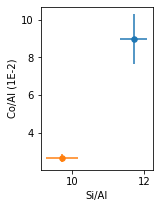

In [33]:
fig, ax = plt.subplots(figsize=(2, 3))

for osda, subdf in df.groupby('SDA'):
    
    ax.scatter(
        subdf['Si/Al'].mean(),
        subdf['Co/Al'].mean() * 100,
        s=30
    )

    ax.errorbar(
        subdf['Si/Al'].mean(),
        subdf['Co/Al'].mean() * 100,
        error_bar(subdf['Co/Al']) * 100,
        error_bar(subdf['Si/Al']),
        label=osda
    )

ax.set_xlabel('Si/Al')
ax.set_ylabel('Co/Al (1E-2)')

plt.show()